<a href="https://colab.research.google.com/github/ITanmayee/wise_ml/blob/main/poker_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data

--2021-04-13 06:03:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613694 (599K) [application/x-httpd-php]
Saving to: ‘poker-hand-training-true.data’

poker-hand-training 100%[===================>] 599.31K  1.82MB/s    in 0.3s    

2021-04-13 06:03:30 (1.82 MB/s) - ‘poker-hand-training-true.data’ saved [613694/613694]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/poker-hand-training-true.data')
data.head()

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [ ]:
data.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class']
data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [ ]:
data['Class'].unique()

array([9, 8, 1, 0, 4, 3, 2, 5, 6, 7])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25009 entries, 0 to 25008
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25009 non-null  int64
 1   C1      25009 non-null  int64
 2   S2      25009 non-null  int64
 3   C2      25009 non-null  int64
 4   S3      25009 non-null  int64
 5   C3      25009 non-null  int64
 6   S4      25009 non-null  int64
 7   C4      25009 non-null  int64
 8   S5      25009 non-null  int64
 9   C5      25009 non-null  int64
 10  Class   25009 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


<Figure size 1440x1440 with 0 Axes>

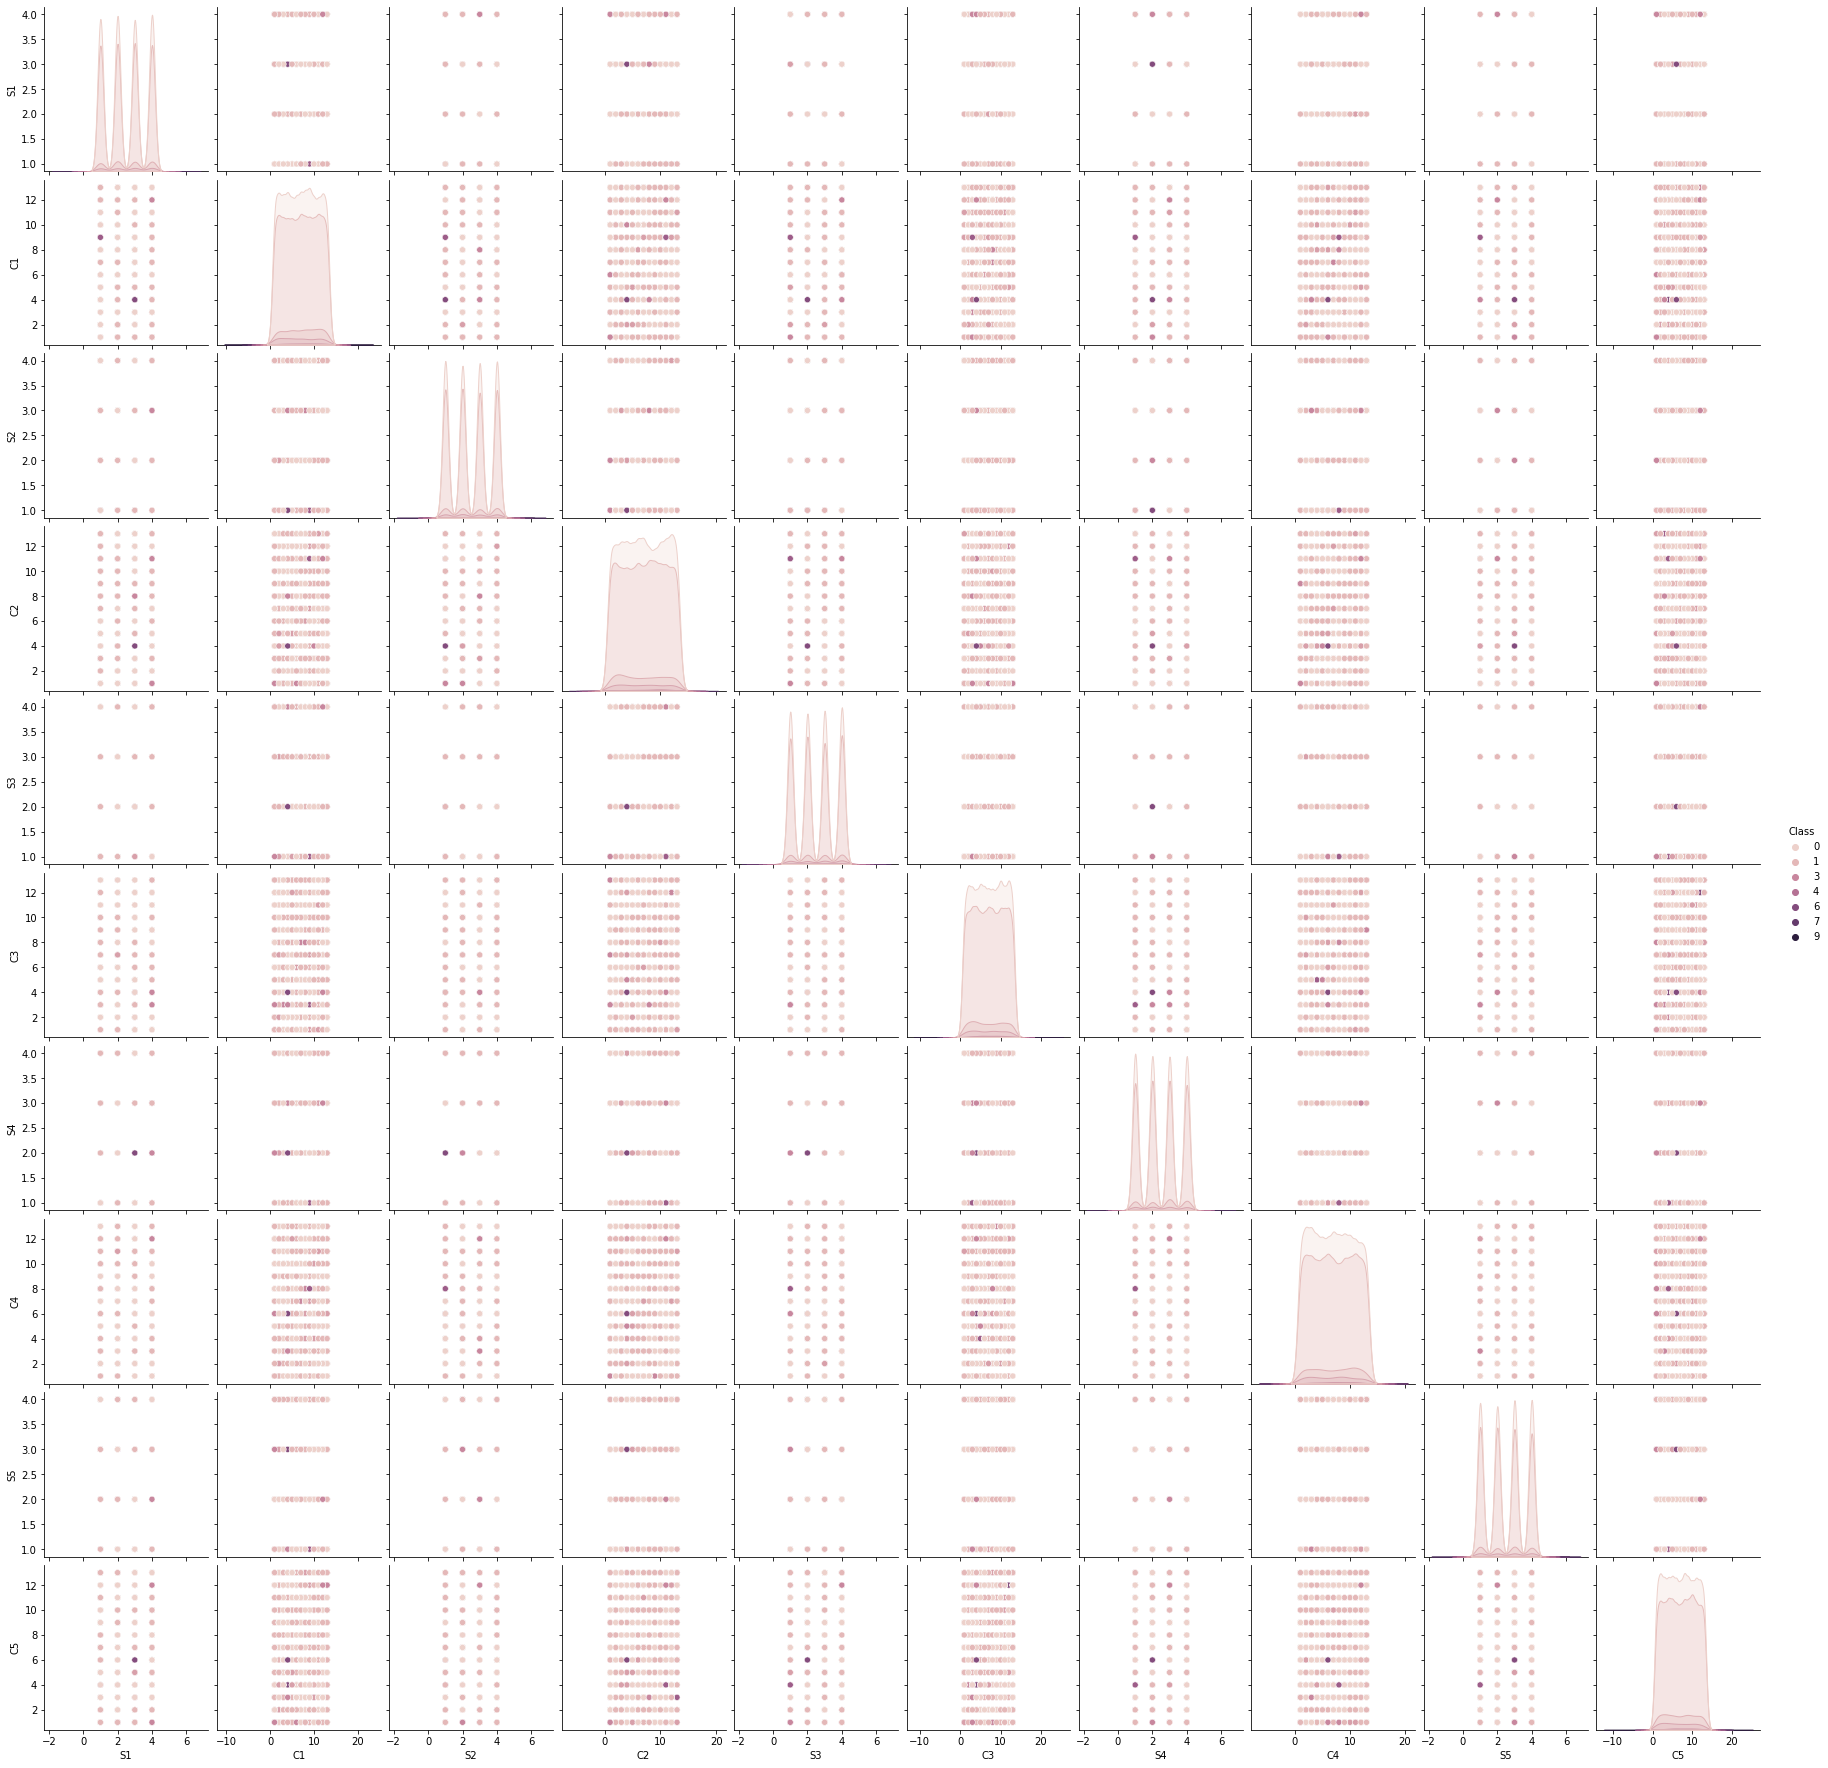

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='Class')
plt.show()
plt.close()

In [ ]:
features = data.drop(['Class'], axis=1)
target = data['Class']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

In [ ]:
k_range = range(1, 20)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)

    train_pred = knn_model.predict(x_train)
    test_pred =  knn_model.predict(x_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

print(train_acc)
print(test_acc)

[1.0, 0.7512370670265407, 0.7442395161693407, 0.7034038086669666, 0.6943569750587294, 0.6767131503973609, 0.6740140950667266, 0.6622182236217324, 0.659919028340081, 0.6537711800869695, 0.6499225271155096, 0.6486729644624382, 0.6425251162093267, 0.643474783825661, 0.6408257110011496, 0.6413755185685011, 0.636827110511321, 0.6352776528215125, 0.6343779677113011]
[0.5149940023990404, 0.5445821671331468, 0.5295881647341063, 0.5491803278688525, 0.5413834466213514, 0.5535785685725709, 0.5491803278688525, 0.5535785685725709, 0.5537784886045581, 0.5551779288284686, 0.5589764094362255, 0.5585765693722511, 0.5585765693722511, 0.5581767293082767, 0.5585765693722511, 0.5569772091163535, 0.5559776089564175, 0.5631747301079568, 0.5641743302678929]


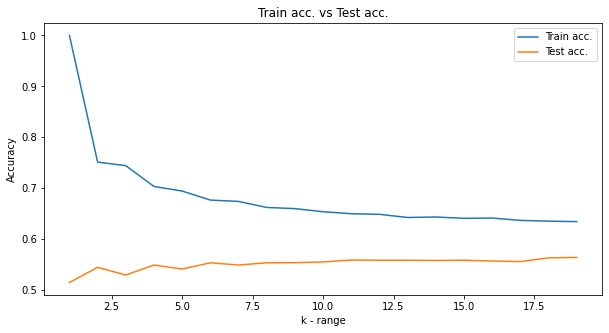

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

train_pred = knn_model.predict(x_train)
test_pred =  knn_model.predict(x_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 51.499%
